In [114]:
## %matplotlib inline

import numpy as np
from fleck import generate_spots, Star
import matplotlib.pyplot as plt
from batman import TransitParams, TransitModel
import astropy.units as u
from sun import draw_random_sunspot_latitudes, draw_random_sunspot_radii
import sys

# np.random.seed(1984)

# np.random.seed(8)

# np.random.seed(3141592)

np.random.seed(31415)


spot_contrast = 0.7
u_ld = [0.5079, 0.2239]

# n_spots = 14 # half solar max

n_spots = 28 # 14 * 100 # solar max

inc_stellar = 90 * u.deg

planet = TransitParams()
planet.per = 5
planet.a = 15
planet.rp = 0.058330305324663184
planet.w = 90
planet.ecc = 0
planet.t0 = 0
planet.limb_dark = 'quadratic'
planet.u = u_ld

times = np.linspace(planet.t0-0.08, planet.t0+0.08, 150)

star = Star(spot_contrast=spot_contrast, u_ld=u_ld, rotation_period=26)

lambdas = np.load('data/lambdas.npy')

n_iterations = 1

residual_ptp = []

b = 0.2#np.random.rand()
planet.inc = np.degrees(np.arccos(b/planet.a))

# Draw lambda randomly from actual lambda distribution of hot Jupiters
planet.lam = 12 #lambdas[np.random.randint(0, len(lambdas))]

# Draw spot latitude and radius from actual sunspot distributions
lons = 360 * np.random.rand(n_spots)[:, np.newaxis] * u.deg
lats = draw_random_sunspot_latitudes(n_spots)[:, np.newaxis] 
radii = 0.02 + (0.08 - 0.02)*np.random.randn(n_spots)[:, np.newaxis] #0.04 * np.ones(n_spots)[:, np.newaxis]

lcs, spots_occulted = star.light_curve(lons, lats, radii, inc_stellar, planet=planet, 
                                       times=times, return_spots_occulted=True, fast=True)

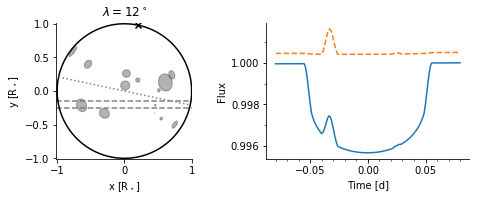

In [115]:
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(1, 2, figsize=(8, 2.5))
ax[1].plot(times, lcs[:, 0]/lcs[:, 0].max())

transit_model = TransitModel(planet, times).light_curve(planet)
ax[1].plot(times, 0.0005 + lcs[:, 0] / transit_model / lcs.max(), ls='--')

star.plot(lons, lats, radii, inc_stellar, time=times[0], planet=planet, ax=ax[0])
ax[1].set(xlabel='Time [d]', ylabel='Flux')
ax[0].set(xlabel='x [R$_\star$]', ylabel='y [R$_\star$]', title='$\\lambda = {0}^\circ$'.format(planet.lam))

ax[1].xaxis.set_minor_locator(MultipleLocator(0.01))
ax[1].yaxis.set_minor_locator(MultipleLocator(0.001))

for s in ['right', 'top']:
    for axis in ax: 
        axis.spines[s].set_visible(False)
plt.savefig('plots/spots_vis.pdf', bbox_inches='tight')
plt.show()